In [1]:
from src.bpe_tokenizer import YttmTokenizer
import json

from src.dataset import PairsDataset

import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

import transformers

In [2]:
#tokenizer = YttmTokenizer('./data/bpe_30000_size.model')
#sent = 'Я люблю котов'
#t = tokenizer.tokenize(sent, add_bos=True)
#print(t)
#t = tokenizer.encode(t)
#print(t)
#t = tokenizer.decode(t)
#print(t)

model_name = 'DeepPavlov/rubert-base-cased'
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)

Downloading: 100%|██████████| 642/642 [00:00<00:00, 21.5kB/s]
Downloading: 100%|██████████| 1.65M/1.65M [00:01<00:00, 1.18MB/s]
Downloading: 100%|██████████| 112/112 [00:00<00:00, 33.4kB/s]
Downloading: 100%|██████████| 2.00/2.00 [00:00<00:00, 356B/s]


In [3]:
with open('./data/data_sample.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [4]:
data['1009862'].keys()

dict_keys(['broadcast', 'news'])

In [5]:
dataset = PairsDataset(data, tokenizer)

In [7]:
br_len = []
for i in tqdm.tqdm(range(len(dataset.data))):
    s = dataset.data[i]['broadcast']
    br_len.append(len(tokenizer.tokenize(s)))

100%|██████████| 83588/83588 [15:06<00:00, 92.20it/s]


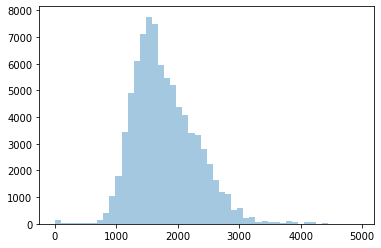

In [10]:
 sns.distplot(br_len, kde=False)

In [11]:
news_len = []
for i in tqdm.tqdm(range(len(dataset.data))):
    s = dataset.data[i]['news']
    news_len.append(len(tokenizer.tokenize(s)))

100%|██████████| 83588/83588 [01:17<00:00, 1082.50it/s]


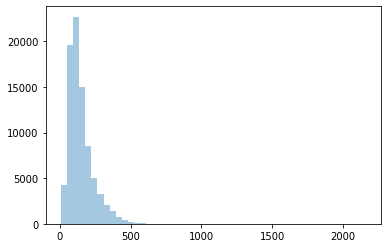

In [12]:
 sns.distplot(news_len, kde=False)

In [1]:
import torch

In [102]:
a_ = torch.rand((2, 10, 100))
a = a_/a_.norm(dim=2).unsqueeze(2).repeat(1, 1, 100)
a = a.bmm(a.permute(0, 2, 1))
a = (a - torch.diag(torch.ones((10))).unsqueeze(0))

In [103]:
a[0]

tensor([[-1.7881e-07,  7.3001e-01,  7.9314e-01,  7.7936e-01,  7.1572e-01,
          7.9521e-01,  7.6711e-01,  7.7460e-01,  7.8146e-01,  8.1878e-01],
        [ 7.3001e-01, -1.1921e-07,  7.5306e-01,  8.2719e-01,  7.9056e-01,
          7.3392e-01,  7.0528e-01,  7.7540e-01,  7.2706e-01,  7.4615e-01],
        [ 7.9314e-01,  7.5306e-01, -2.9802e-07,  7.8044e-01,  7.4218e-01,
          7.8927e-01,  7.4758e-01,  7.5355e-01,  8.1239e-01,  7.7959e-01],
        [ 7.7936e-01,  8.2719e-01,  7.8044e-01,  0.0000e+00,  7.9349e-01,
          8.1029e-01,  7.5649e-01,  7.8055e-01,  8.2247e-01,  8.3194e-01],
        [ 7.1572e-01,  7.9056e-01,  7.4218e-01,  7.9349e-01, -2.3842e-07,
          6.9375e-01,  7.7322e-01,  7.4791e-01,  7.3604e-01,  7.0926e-01],
        [ 7.9521e-01,  7.3392e-01,  7.8927e-01,  8.1029e-01,  6.9375e-01,
          0.0000e+00,  7.5665e-01,  7.6084e-01,  7.6947e-01,  8.0425e-01],
        [ 7.6711e-01,  7.0528e-01,  7.4758e-01,  7.5649e-01,  7.7322e-01,
          7.5665e-01,  0.0000e+0

In [104]:
neg_samples = a.max(dim=1)[1].unsqueeze(2).repeat(1, 1, 100)
#neg = a_[neg_samples]

In [105]:
neg = torch.gather(a_, index=neg_samples, dim=1)

In [107]:
(a_ - neg).norm(dim=2)

tensor([[3.3832, 3.4303, 3.6782, 3.3344, 3.8158, 3.6324, 3.8298, 3.8244, 3.4407,
         3.3344],
        [3.6959, 3.9218, 3.8965, 3.9640, 3.7523, 3.9363, 3.6959, 4.1285, 3.7523,
         3.8520]])

In [112]:
torch.FloatTensor([1.]).unsqueeze(0).shape

torch.Size([1, 1])

In [120]:
pos = torch.rand((2, 10, 100))
anch = torch.rand((2, 10, 100))
from src.losses import OnlineTripletLoss

criterion = OnlineTripletLoss(5)

loss = criterion({'anchor': anch, 'positive': pos})

In [121]:
loss

tensor(3.9758)